<a href="https://colab.research.google.com/github/bakibillahrahat/cvpr/blob/main/Final/CPVR_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

In [31]:

# CIFAR10 dataset Loading
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print()
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of x_train: (50000, 32, 32, 3)
Shape of y_train: (50000, 1)

Shape of x_test: (10000, 32, 32, 3)
Shape of y_test: (10000, 1)


In [32]:
# Normalization
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Reshaping the input data
x_train = x_train.reshape((-1, 32, 32, 3))
x_test = x_test.reshape((-1, 32, 32, 3))

# Converting the labels to one-hot encoded vectors
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

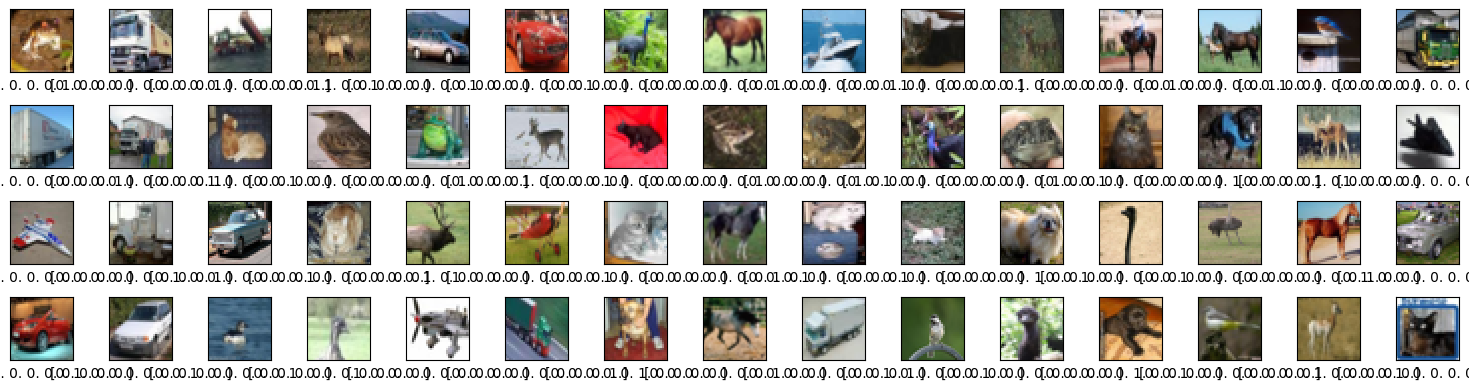

In [33]:
ROWS = 4
COLS = 15
i = 0

plt.figure(figsize=(15,4))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(x_train[i], cmap=plt.cm.gray_r)

        plt.xticks([])
        plt.yticks([])
        plt.xlabel(y_train[i])
        i += 1
plt.tight_layout()
plt.show()

In [41]:
def build_model():
    model = keras.Sequential(
        [
            layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(32, 32, 3)),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Flatten(),
            layers.Dense(128, activation="relu"),
            layers.Dense(10, activation="softmax"),
        ]
    )
    return model

model = build_model()

In [42]:
# Applying SGD optimizer
model_sgd = build_model()
model_sgd.compile(
    loss="categorical_crossentropy",
    optimizer=keras.optimizers.SGD(learning_rate=0.01),
    metrics=["accuracy"],
)

In [43]:
# Applying Adam optimizer
model_adam = build_model()
model_adam.compile(
    loss="categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"],
)

In [44]:
# Applying RMSprop optimizer
model_rmsprop = build_model()
model_rmsprop.compile(
    loss="categorical_crossentropy",
    optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
    metrics=["accuracy"],
)


In [45]:
# Train the models and record their accuracy and loss
history_sgd = model_sgd.fit(x_train, y_train, epochs=3, batch_size=64, validation_split=0.2)
history_adam = model_adam.fit(x_train, y_train, epochs=3, batch_size=64, validation_split=0.2)
history_rmsprop = model_rmsprop.fit(x_train, y_train, epochs=3, batch_size=64, validation_split=0.2)

# Evaluate the models on the test set
test_loss_sgd, test_acc_sgd = model_sgd.evaluate(x_test, y_test)
test_loss_adam, test_acc_adam = model_adam.evaluate(x_test, y_test)
test_loss_rmsprop, test_acc_rmsprop = model_rmsprop.evaluate(x_test, y_test)

# Print the test set accuracy for each optimizer
print('Test set accuracy for SGD optimizer:', test_acc_sgd)
print('Test set accuracy for Adam optimizer:', test_acc_adam)
print('Test set accuracy for RMSprop optimizer:', test_acc_rmsprop)


Epoch 1/3
625/625 [==============================] - 47s 74ms/step - loss: 2.1541 - accuracy: 0.2138 - val_loss: 1.9622 - val_accuracy: 0.2997
Epoch 2/3
625/625 [==============================] - 45s 73ms/step - loss: 1.8939 - accuracy: 0.3260 - val_loss: 1.7977 - val_accuracy: 0.3701
Epoch 3/3
625/625 [==============================] - 46s 74ms/step - loss: 1.7218 - accuracy: 0.3909 - val_loss: 1.6727 - val_accuracy: 0.4007
Epoch 1/3
625/625 [==============================] - 50s 78ms/step - loss: 1.5288 - accuracy: 0.4468 - val_loss: 1.2973 - val_accuracy: 0.5380
Epoch 2/3
625/625 [==============================] - 48s 77ms/step - loss: 1.2005 - accuracy: 0.5772 - val_loss: 1.1858 - val_accuracy: 0.5836
Epoch 3/3
625/625 [==============================] - 47s 74ms/step - loss: 1.0592 - accuracy: 0.6292 - val_loss: 1.0892 - val_accuracy: 0.6241
Epoch 1/3
625/625 [==============================] - 47s 74ms/step - loss: 1.5991 - accuracy: 0.4256 - val_loss: 1.3339 - val_accuracy: 0.5264

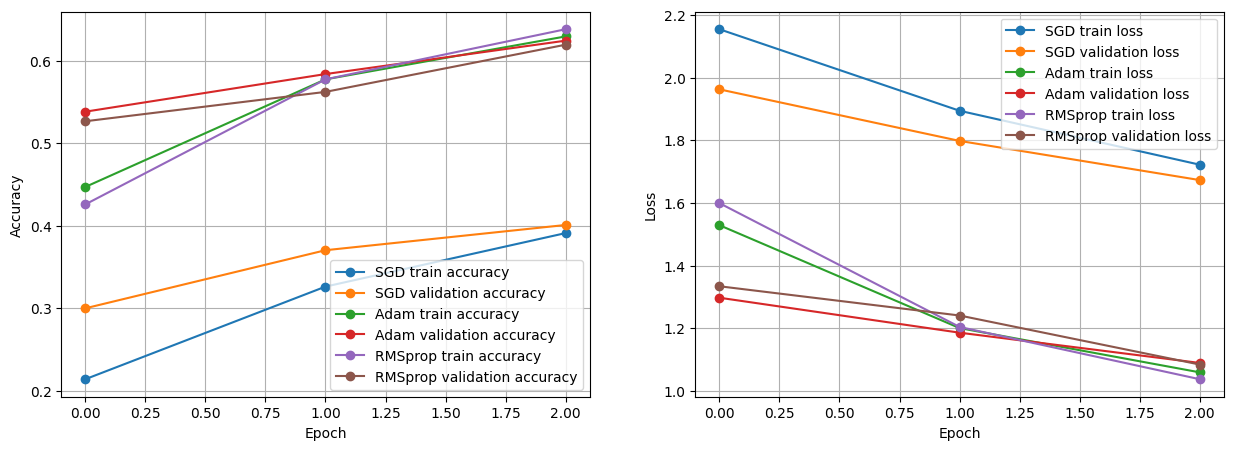

In [46]:
# Plot the comparison of the three optimizers' performance
plt.figure(figsize=(15,5))

# Plot the accuracy
plt.subplot(1,2,1)
plt.plot(history_sgd.history['accuracy'], 'o-', label='SGD train accuracy')
plt.plot(history_sgd.history['val_accuracy'], 'o-', label = 'SGD validation accuracy')
plt.plot(history_adam.history['accuracy'], 'o-', label='Adam train accuracy')
plt.plot(history_adam.history['val_accuracy'], 'o-', label = 'Adam validation accuracy')
plt.plot(history_rmsprop.history['accuracy'], 'o-', label='RMSprop train accuracy')
plt.plot(history_rmsprop.history['val_accuracy'], 'o-', label = 'RMSprop validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

# Plot the loss
plt.subplot(1,2,2)
plt.plot(history_sgd.history['loss'], 'o-', label='SGD train loss')
plt.plot(history_sgd.history['val_loss'], 'o-', label='SGD validation loss')
plt.plot(history_adam.history['loss'], 'o-', label='Adam train loss')
plt.plot(history_adam.history['val_loss'], 'o-', label='Adam validation loss')
plt.plot(history_rmsprop.history['loss'], 'o-', label='RMSprop train loss')
plt.plot(history_rmsprop.history['val_loss'], 'o-', label='RMSprop validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()